In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df3 = pd.read_csv("products.csv")
df3.shape

(8, 2)

In [3]:
df3.head()

,Product,Sales_Price
0,GTXAdvanced,649.0
1,GTXBasic,641.0
2,MGRPFU,3959.0
3,MGRPFS,64.0
4,GTXPlusBasic,1279.0


In [4]:
df3.describe().T

,count,mean,std,min,25%,50%,75%,max
Sales_Price,8.0,6230.0,10388.306214,64.0,647.0,2619.0,5816.75,31229.0


In [5]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Product      8 non-null      object 
 1   Sales_Price  8 non-null      float64
dtypes: float64(1), object(1)
memory usage: 260.0+ bytes


In [6]:
df3.isnull().sum()

Product        0
Sales_Price    0
dtype: int64

# UNIVARIATE ANALYSIS

Numerical Values

In [7]:
df3.select_dtypes(include=np.number).columns

Index(['Sales_Price'], dtype='object')

In [8]:
plt.rcParams['figure.figsize']=[15,8]

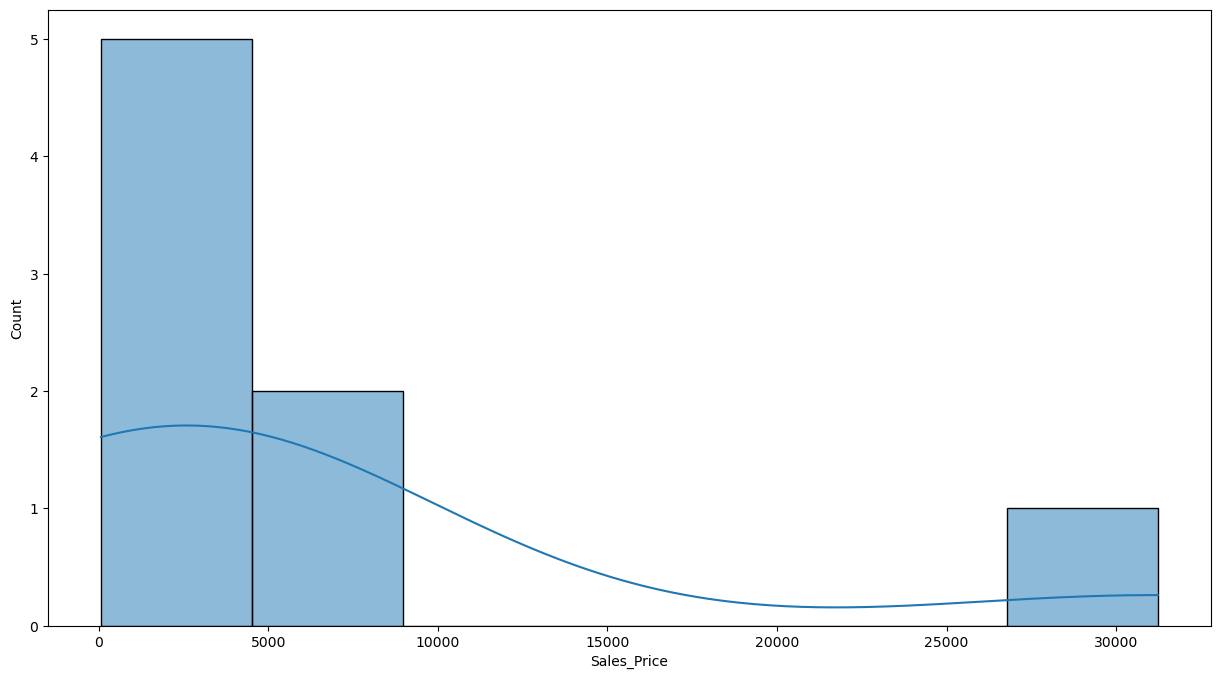

In [9]:
sns.histplot(df3['Sales_Price'], kde=True)
plt.show()

Inference -
            sales price is slitly decreasing over the count

### Categorical Columns

In [10]:
df3.select_dtypes(include=object).columns

Index(['Product'], dtype='object')

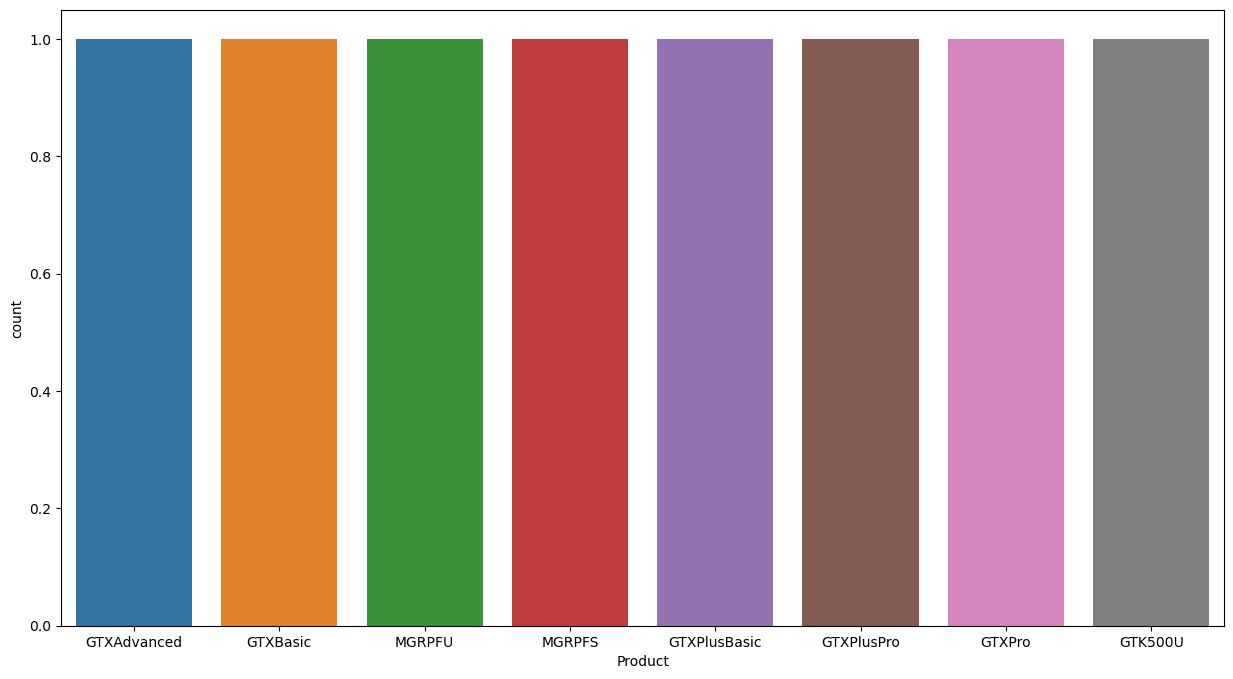

In [11]:
sns.countplot(x='Product', data=df3)
plt.show()

**Inference**
* all the products having the nearly same count

## Bivariate analysis

### num vs cat

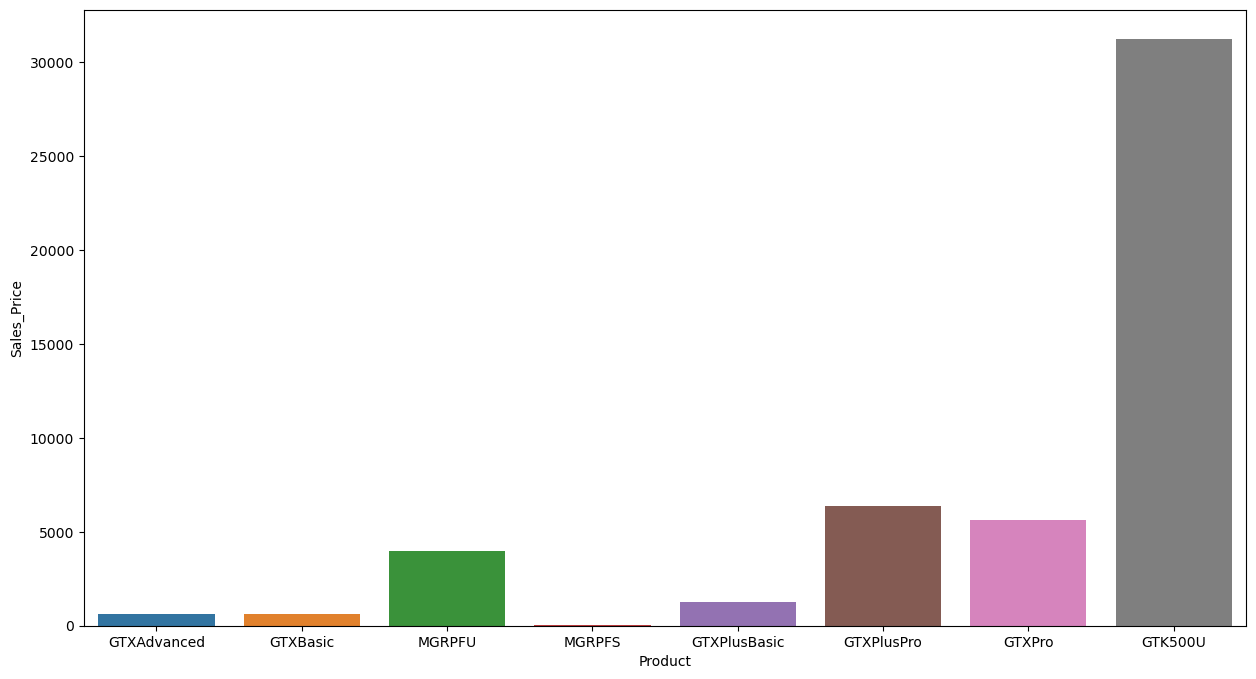

In [12]:
sns.barplot(x='Product', y='Sales_Price',data=df3, estimator=np.mean)
plt.show()

**inference**

* all the products are having there respective sales prices

## Multivariate Analysis

C:\Users\Dell\AppData\Local\Temp\ipykernel_17880\603941181.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df3.corr(), annot=True)


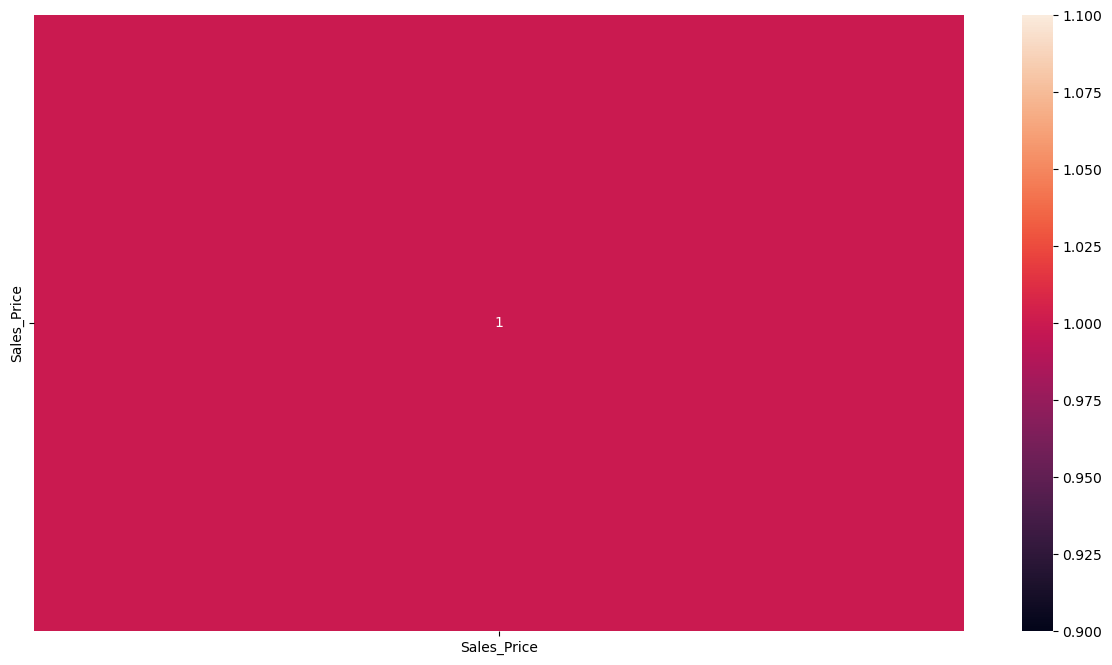

In [13]:
sns.heatmap(df3.corr(), annot=True)

# Show the plot
plt.show()

**inference**

* no correlation among the features

## Outliers Treatment

<Axes: >

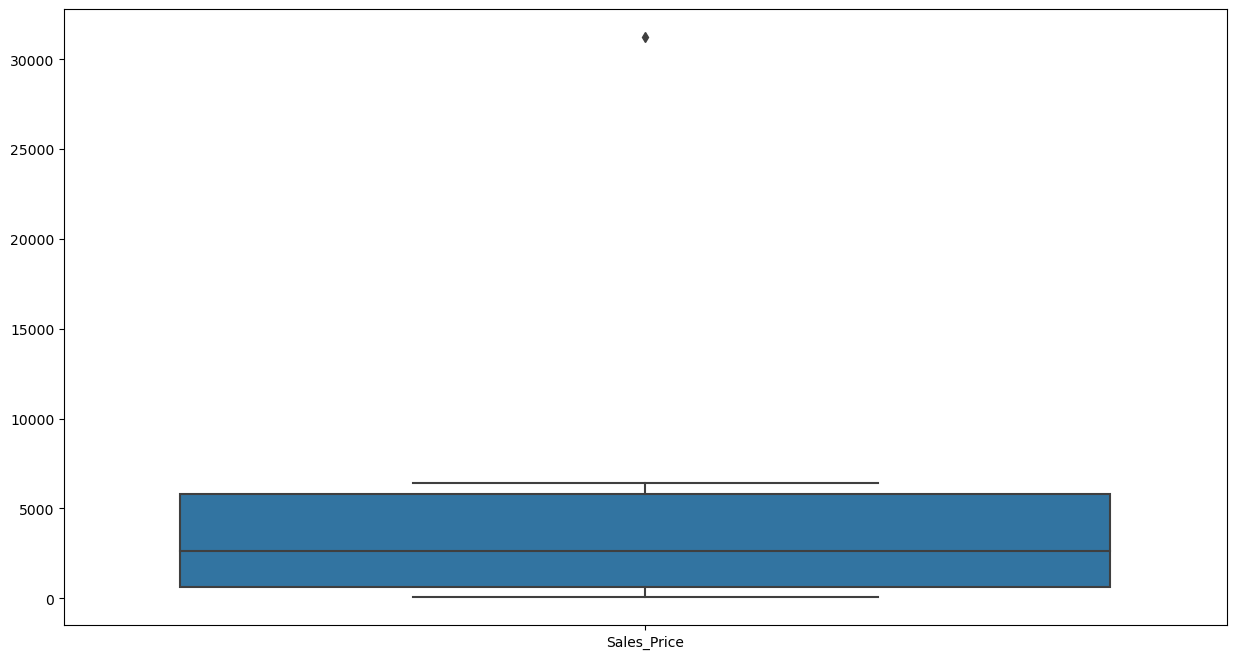

In [14]:
sns.boxplot(data=df3)

**Inference**
* We can see that revenueand sales price has outliers

**Inference**
* From the above graph we can see that there noise in 1 features.
* Therefore we will use 3*iqr so that we will remove outliers like noise rather than the pattern

In [16]:
check = df3[['Product','Sales_Price' ]]

q1 = check.quantile(0.25)
q3 = check.quantile(0.75)
iqr = q3 - q1

ll = q1 - 3*iqr
ul = q3 + 3*iqr

df = df3[~((check<ll)|(check>ul)).any(axis=1)]
df.shape

C:\Users\Dell\AppData\Local\Temp\ipykernel_17880\757886415.py:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  q1 = check.quantile(0.25)
C:\Users\Dell\AppData\Local\Temp\ipykernel_17880\757886415.py:4: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  q3 = check.quantile(0.75)
C:\Users\Dell\AppData\Local\Temp\ipykernel_17880\757886415.py:10: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df = df3[~((check<ll)|(check>ul)).any(axis=1)]
C:\Users\Dell\AppData\Local\Temp\ipykern

(7, 2)

(array([1]), [Text(1, 0, 'Sales_Price')])

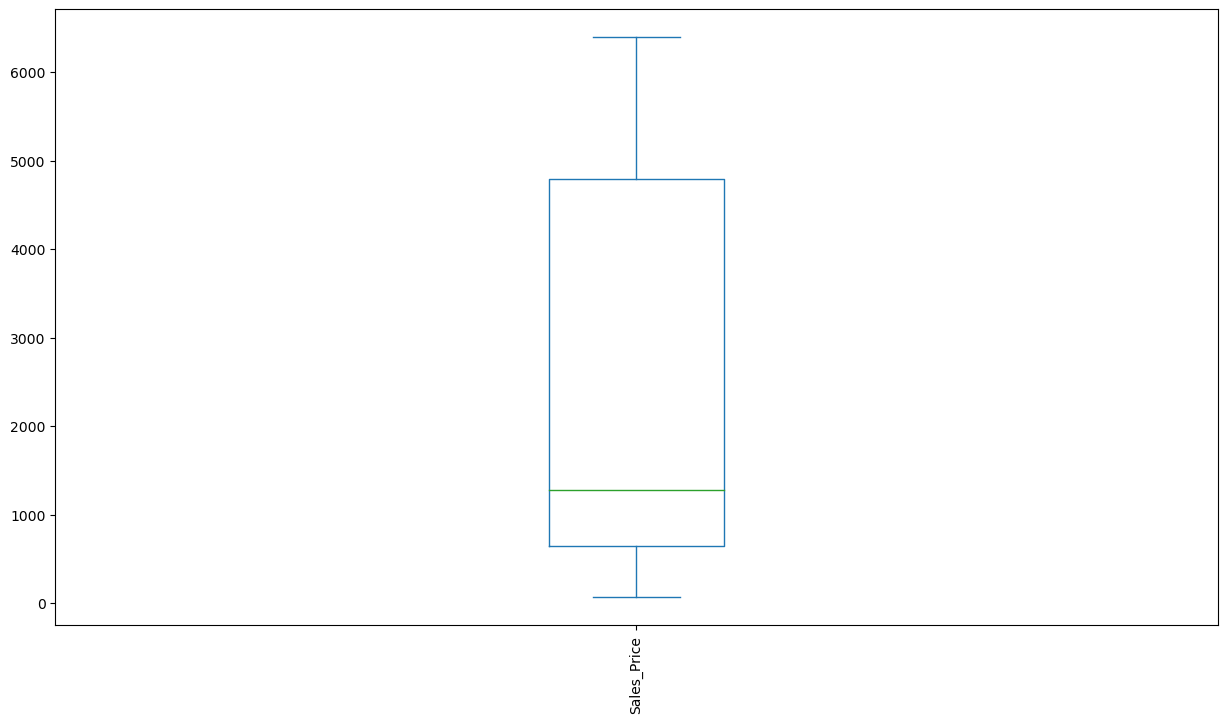

In [17]:
df.plot(kind='box')
plt.xticks(rotation=90)

**Inference**
* From the above graph we can see that noise has been removed but the pattern is still there.